1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

from math import isclose

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import scipy as sp
from scipy.interpolate import UnivariateSpline
from scipy import fftpack
from scipy import optimize as opt

import pylab as pb 
from mpl_toolkits.mplot3d import Axes3D
import pylab as plb
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import pickle
import pylab as plb
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy.optimize import minimize
from scipy import stats
import pylab as plb
import matplotlib.pyplot as plt
from scipy import optimize

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Text(0.5, 1.0, 'Max Temperature')

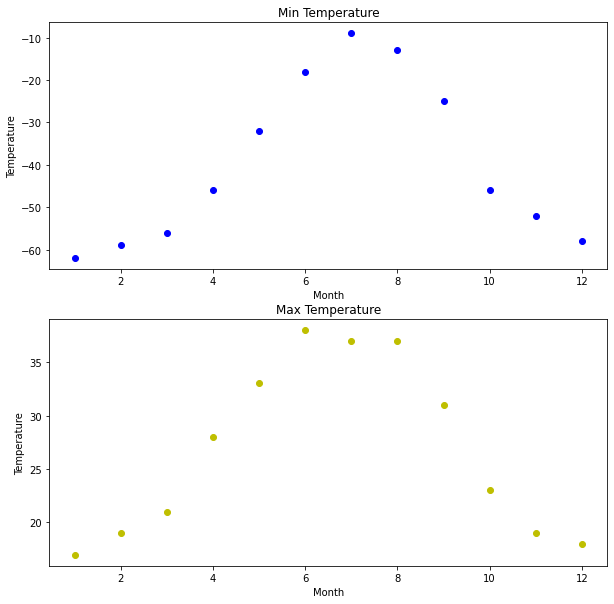

In [12]:
max_temp=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_temp=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]


Month=[1,2,3,4,5,6,7,8,9,10,11,12]
fig, (ax1, ax2) = plt.subplots(2,  figsize=(10, 10))
ax1.scatter(Month, min_temp, c='b')
ax1.set_xlabel("Month")
ax1.set_ylabel("Temperature")
ax1.set_title("Min Temperature")

ax2.scatter(Month, max_temp, c='y')
ax2.set_xlabel("Month")
ax2.set_ylabel("Temperature")
ax2.set_title("Max Temperature")



Text(0, 0.5, 'Max Tempereture')

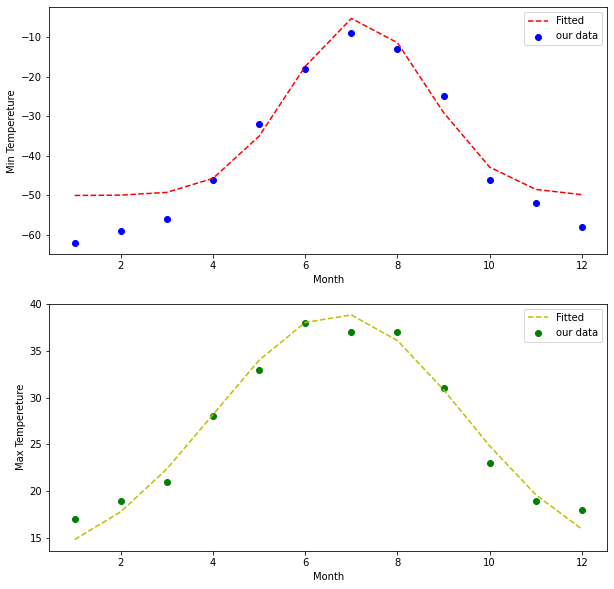

In [17]:
def f(x,A, B):
    return 45*(np.exp(-(x - A) ** 2 / (2 * B ** 2))) - 50

x = Month
y = min_temp
popt, pcov = curve_fit(f, x, y, p0=[6,1], maxfev=2000)
fig, (ax3, ax4) = plt.subplots(2,  figsize=(10, 10))
ax3.scatter(Month, y, c='b', label='our data')
ax3.plot(Month, f(x, popt[0], popt[1]),'r--', label='Fitted')
ax3.legend(loc='best')
ax3.set_xlabel("Month")
ax3.set_ylabel("Min Tempereture")


def f(x,A, B):
    return 27*(np.exp(-(x - A) ** 2 / (2 * B ** 2))) +12

x = Month
y = max_temp
popt, pcov = curve_fit(f, x, y, p0=[6,1], maxfev=2000)
ax4.scatter(Month, y, c='g', label='our data')
ax4.plot(Month, f(x, popt[0], popt[1]),'y--', label='Fitted')
ax4.legend(loc='best')
ax4.set_xlabel("Month")
ax4.set_ylabel("Max Tempereture")

Actually I think they are not too bad, although I am not so satisfied with the first one, I think gaussian is the best solution. Also in my opinion, I need more data to get a better fit and observe our fitting accuracy.

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

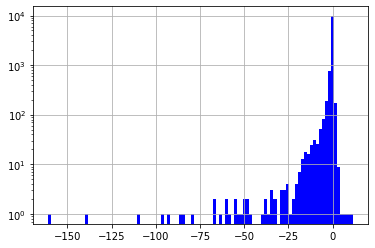

In [114]:
with open('residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)
    
a=data.tolist()
data=a['residuals']
n, bins, patches = plt.hist(a['residuals'], 100, facecolor='b', alpha=1)
plt.yscale('log')
plt.grid(True)
uncertainty=np.sqrt(n)

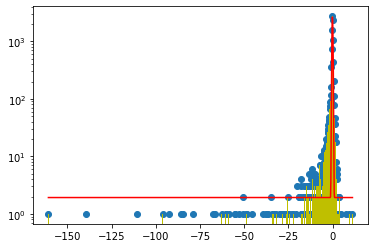

In [112]:
n, bins, patches = plt.hist(a['residuals'], 1000, facecolor='y', alpha=1)
x=(bins[1:]+bins[:-1])/2
y=[]
for i in range(len(n)):
    y.append(n[i])
plt.scatter(x,y)
plt.yscale('log')

def f(x,N,A, B,off):
    return N*(np.exp(-(x - A) ** 2 / (2 * B ** 2))) +off

y=np.asarray(y)
p0,p1 = optimize.curve_fit(f,x,y)
plt.plot(x,f(x,*p0),'r')

In [116]:
def f(x,N,A, B,off):
    return N*(np.exp(-(x - A) ** 2 / (2 * B ** 2))) +off

y=np.asarray(y)

p0,p1 = optimize.curve_fit(f,x,np.asarray(y))
np.sum((y-f(x,*p0))**2)
ssr = np.sum((y-(f(x,*p0)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y))

R2 = 0.9877016036163168 
R = 0.9938317783288663
Covariance matrix:
 [[1.         0.12523836]
 [0.12523836 1.        ]]


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [121]:
df=pd.read_csv("munich_temperatures_average_with_bad_data.txt",sep=" ",header=None)

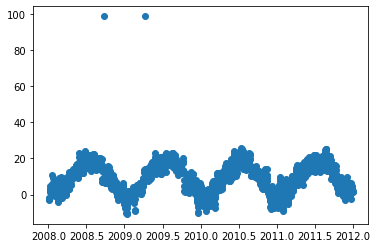

In [145]:
Temps=df[1]
def f(t,a,b,c):
    return a*np.cos(2*t*np.pi+b)+c
df=df[(df[0]> 2008) & (df[0]<2012)]
plt.scatter(df[0],Temps)
x=df[0]
y=df[1]

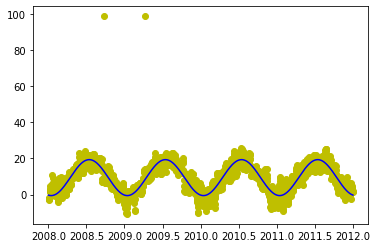

In [146]:
popt, pcov = optimize.curve_fit(f, df[0], df[1])
plt.scatter(df[0],df[1],color='y')
plt.plot(df[0],f(df[0],*popt),'b')

In [147]:
print('the best fit values of the parameters are:','a=',popt[0],'b=',popt[1],'c=',popt[2])

the best fit values of the parameters are: a= -9.988133689134516 b= 12.333023014196588 c= 9.38411486809072


In [153]:
print("\nThe overal average temperature is:\n", np.average(Temps))
dd=np.linspace(int(np.min(df[0])),int(np.max(df[0])),1000)
mn=np.min(f(dd,*popt))
mx=np.max(f(dd,*popt))
print('average values predicted by the model for the coldest and hottes:','hottest=',mx,'coldest=',mn)


The overal average temperature is:
 9.384097734976043
average values predicted by the model for the coldest and hottes: hottest= 19.372217151652062 coldest= -0.6037792240876048


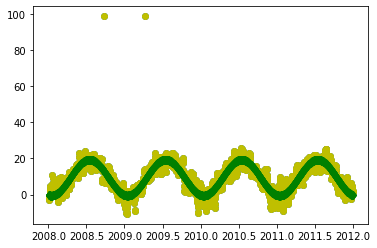

In [168]:
def g(t,a,b,c,d):
    return a*np.cos(2*t*np.pi*b+c)+d
df=df[(df[0]> 2008) & (df[0]<2012)]
plt.scatter(df[0],Temps)
x=df[0]
y=df[1]
popt1, pcov = optimize.curve_fit(g, df[0], df[1])
plt.scatter(df[0],df[1],color='y')
plt.plot(df[0],g(df[0],*popt1),'dg')

In [156]:
ssr = np.sum((y-(f(x,*popt)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y))

R2 = 0.6795934800804344 
R = 0.8243745993663526
Covariance matrix:
 [[1.         0.01341277]
 [0.01341277 1.        ]]


In [163]:
ssr = np.sum((y-(g(x,*popt1)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y))

R2 = 0.6796593571445483 
R = 0.8244145541804488
Covariance matrix:
 [[1.         0.01341277]
 [0.01341277 1.        ]]
